# Multiple Linear Regression


LinearRegression fits a linear model with coefficients w = (w1, …, wp) to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation.

선형회귀분석. RSS(잔차 제곱 합) 값을 최소화 하는 방향으로 Y=wX 방정식의 w값을 구하는 모형.
잔차: y값과 y값으로 추정된 값의 차이

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html?highlight=linearregression#sklearn.linear_model.LinearRegression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Exercise
Graduate Admission 2

reference. https://www.kaggle.com/mohansacharya/graduate-admissions

Context
- This dataset is created for prediction of Graduate Admissions from an Indian perspective.

Content
- The dataset contains several parameters which are considered important during the application for Masters Programs.
- The parameters included are :
    1. GRE Scores ( out of 340 )
    1. TOEFL Scores ( out of 120 )
    1. University Rating ( out of 5 )
    1. Statement of Purpose and Letter of Recommendation Strength ( out of 5 )
    1. Undergraduate GPA ( out of 10 )
    1. Research Experience ( either 0 or 1 )
    1. Chance of Admit ( ranging from 0 to 1 )

### Step1: Load Dataset

In [2]:
# 'Admission_Predict.csv' 파일 읽기 pd.read_csv()
# df shape 확인

df = pd.read_csv('Admission_Predict.csv')
df.shape

(400, 9)

In [3]:
# df tail 행 보기

df.tail()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67
399,400,333,117,4,5.0,4.0,9.66,1,0.95


In [4]:
# index역할을 하는 'Serial No.' 컬럼 제거하기

df = df.drop(['Serial No.'], axis = 1)

In [7]:
# df descriptive statistics

df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


### Step2: Visualize Dataset

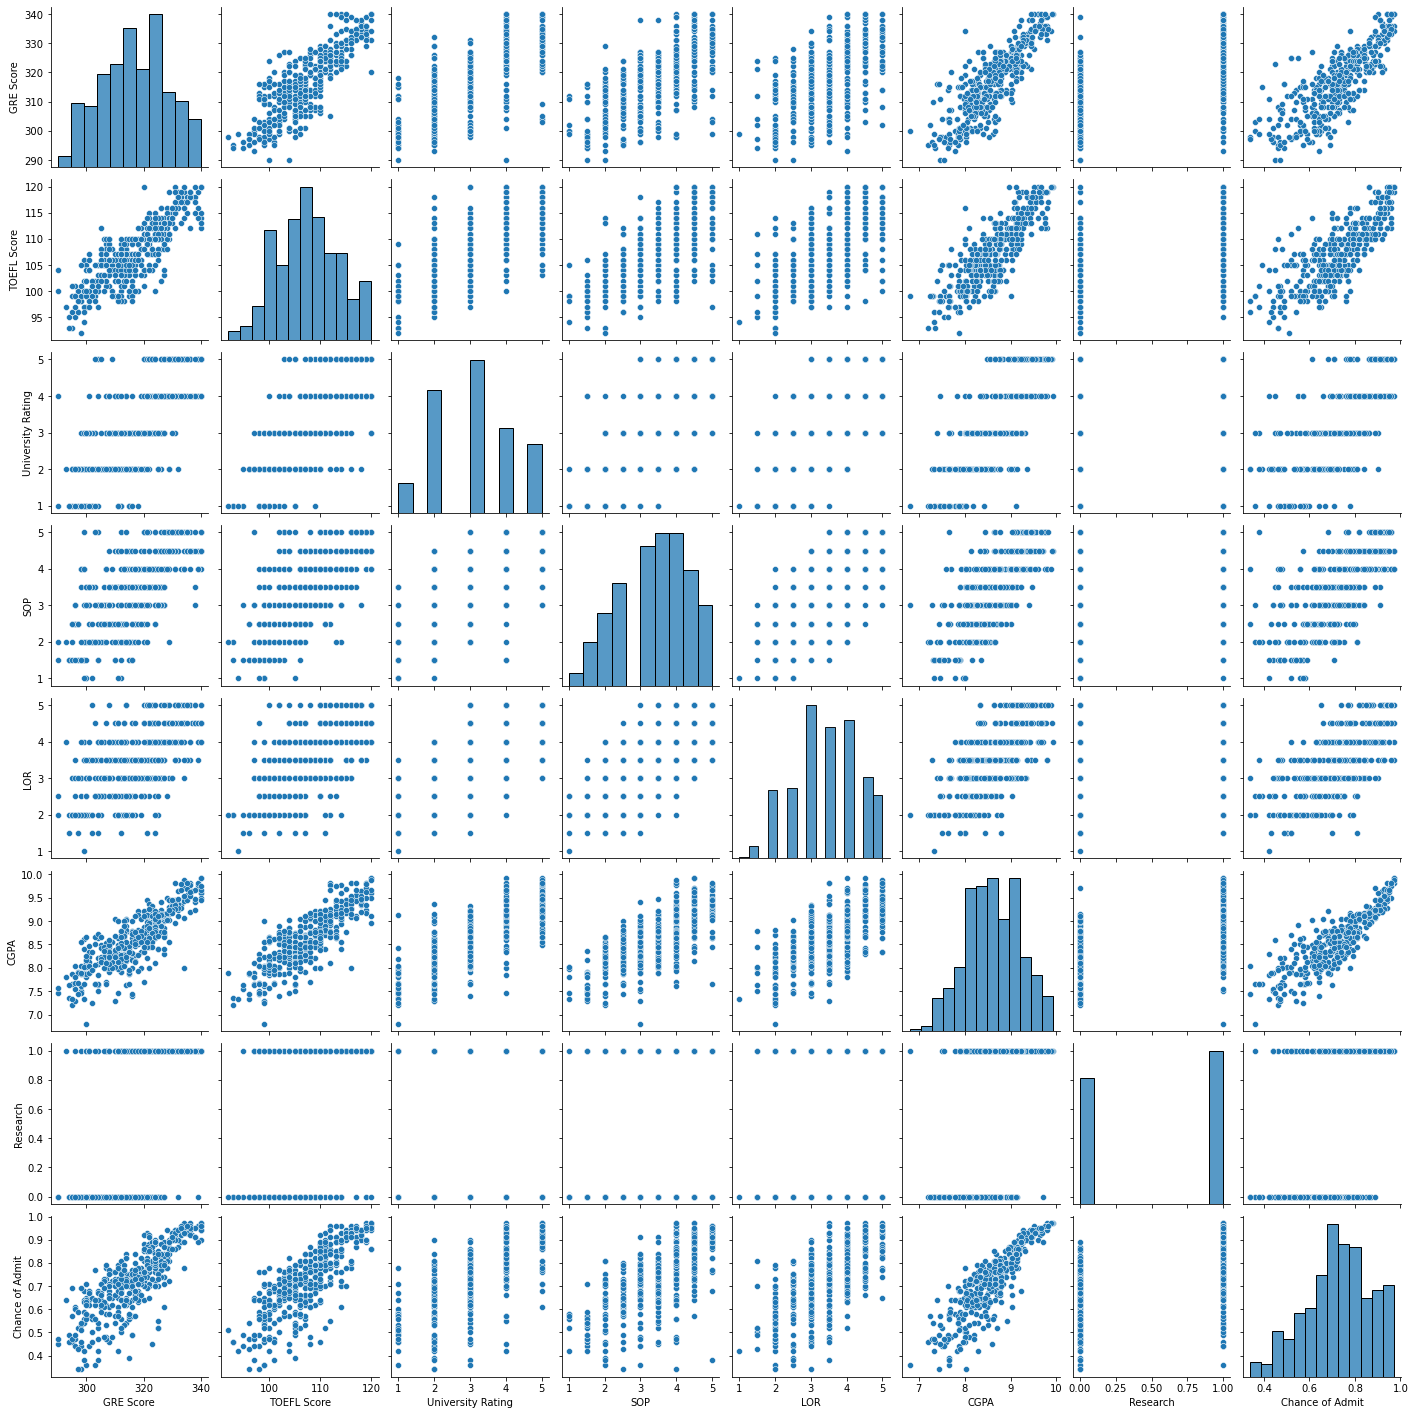

In [6]:
# sns.pairplot()

sns.pairplot(df)

<AxesSubplot:>

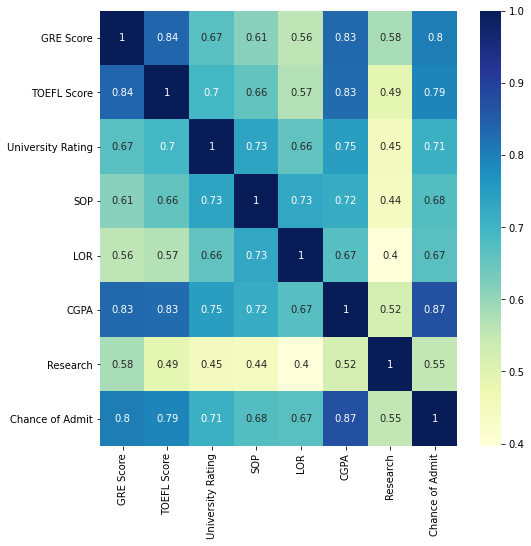

In [7]:
# corr matrix with heatmap
# sns.heatmap, df.corr() 활용

plt.figure(figsize = (8, 8))
sns.heatmap(df.corr(), annot = True, cmap = 'YlGnBu')

### Step3: Define Train set and Test Set

In [8]:
# X에 -1번째 column까지 할당
# y에 -1번째 column을 할당

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [9]:
# split train set and test set

# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test 할당. test_size=0.2, random_state=1

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

## with statsmodel

### Step4, 5: Train Model + Model Evaluation

In [10]:
# https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.OLS.html#statsmodels.regression.linear_model.OLS
# Regression: Ordinary Least Squares(RMSE를 가장 낮추는 것을 지표로 한다 )

import statsmodels.api as sm
# model을 sm.OLS(y, X).fit() 을 이용해서 X_train셋으로 학습. X는 y-intercept를 추가하기 위해 sm.add_constant() 를 활용. sklearn은 파라미터 default옵션으로 표시하도록 되어있음

import statsmodels.api as sm
model = sm.OLS(y_train, sm.add_constant(X_train)).fit()

In [11]:
# summary()를 이용한 model 의 성능 확인
# 해석까지 자동적으로 달아줌
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Chance of Admit   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     179.3
Date:                Thu, 04 Mar 2021   Prob (F-statistic):          2.49e-105
Time:                        21:47:55   Log-Likelihood:                 433.63
No. Observations:                 320   AIC:                            -851.3
Df Residuals:                     312   BIC:                            -821.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.1772      0.139     -8.495      0.000      -1.450      -0.905
GRE Score             0.0015      0.001      2.285      0.023       0.000       0.003
TOEFL Score           0.0031      0.001      2.656      0.008       0.001       0.005
University Rating     0.0082      0.006      1.476      0.141      -0.003       0.019
SOP                  -0.0056      0.006     -0.905      0.366      -0.018       0.007
LOR                   0.0217      0.006      3.576      0.000       0.010       0.034
CGPA                  0.1153      0.014      8.453      0.000       0.088       0.142
Research              0.0261      0.009      2.930      0.004       0.009       0.044
==============================================================================
Omnibus:                       71.422   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              145.863
Skew:                          -1.149   Prob(JB):                     2.12e-32
Kurtosis:                       5.379   Cond. No.                     1.31e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.31e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Condition number problem solution

- 변수들의 단위 차이로 인해 숫자의 스케일이 크게 달라지는 경우. 이 경우에는 스케일링(scaling)으로 해결한다.
- 다중 공선성 즉, 상관관계가 큰 독립 변수들이 있는 경우, 이 경우에는 변수 선택이나 PCA를 사용한 차원 축소 등으로 해결한다.

reference. https://datascienceschool.net/03%20machine%20learning/04.03%20%EC%8A%A4%EC%BC%80%EC%9D%BC%EB%A7%81.html

In [12]:
# X_train 변수들의 'std'를 describe()를 활용하여 확인. -> feature의 스케일이 서로 다르다.

X_train.describe().loc["std"]

GRE Score            11.631158
TOEFL Score           6.095086
University Rating     1.155537
SOP                   1.035759
LOR                   0.904663
CGPA                  0.607339
Research              0.497240
Name: std, dtype: float64

In [12]:
# from sklearn.preprocessing import StandardScaler
# scaler로 StandardScaler() 스케일러 오브젝트 할당
# 스케일링 할 X_train만큼의 데이터를 .fit()을 사용하여 스케일러 생성

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df.iloc[:, :-1])

StandardScaler()

In [14]:
# X_train, X_test 값에 scaler.transform()을 활용하여 값 업데이트

X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns, index=X_train.index)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

In [13]:
# import statsmodels.api as sm
# model 재학습. sm.OLS().fit()
# model 학습 결과: .summary()

import statsmodels.api as sm
model = sm.OLS(y_train, sm.add_constant(X_train)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Chance of Admit   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     179.3
Date:                Thu, 04 Mar 2021   Prob (F-statistic):          2.49e-105
Time:                        21:59:21   Log-Likelihood:                 433.63
No. Observations:                 320   AIC:                            -851.3
Df Residuals:                     312   BIC:                            -821.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.1772      0.139     -8.495      0.000      -1.450      -0.905
GRE Score             0.0015      0.001      2.285      0.023       0.000       0.003
TOEFL Score           0.0031      0.001      2.656      0.008       0.001       0.005
University Rating     0.0082      0.006      1.476      0.141      -0.003       0.019
SOP                  -0.0056      0.006     -0.905      0.366      -0.018       0.007
LOR                   0.0217      0.006      3.576      0.000       0.010       0.034
CGPA                  0.1153      0.014      8.453      0.000       0.088       0.142
Research              0.0261      0.009      2.930      0.004       0.009       0.044
==============================================================================
Omnibus:                       71.422   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              145.863
Skew:                          -1.149   Prob(JB):                     2.12e-32
Kurtosis:                       5.379   Cond. No.                     1.31e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.31e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Step6: Predict value

In [14]:
# predict y values with trained regressor

# model.predict 활용하여 X_test로 y_pred 생성. X_test에는 constant를 추가하여야 함. USE sm.add_constant()

y_pred = model.predict(sm.add_constant(X_test))

Text(0.5, 0, 'True (ground truth)')

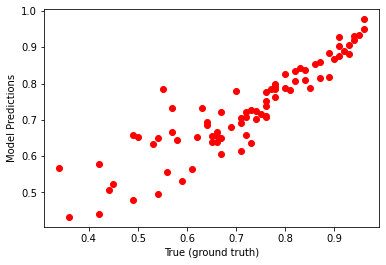

In [15]:
# predict value visualization
plt.scatter(y_test, y_pred, color = 'r')
plt.ylabel('Model Predictions')
plt.xlabel('True (ground truth)')

# Quiz

다른 방법들을 추가해서 더 높은 adj_r2를 값을 가진 모형을 생성해 보세요.

해당 모형은 어떤 면에서 기존 모형보다 더 나아졌다고 할 수 있나요?